In [1]:
import numpy as np
from keras.preprocessing.image import *

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=10,#0~15,
                  width_shift_range=0.1,#좌우로 각각10픽셀 이내
                  height_shift_range=0.1,#상하로
                  shear_range=0.5, #변형
                  zoom_range=[0.8,2.0],#최소 0.8배 최대 2배
                  horizontal_flip=True,
                  vertical_flip=True)

In [3]:
img = load_img('hi/장정은/정은.1.png')
x = img_to_array(img) # shape => (24, 24, 3)
x= x.reshape((1,) + x.shape) # 앞에 1은 이미지가 한개 임

In [4]:
i = 1
for batch in train_datagen.flow(x, batch_size = 1 , save_to_dir='mywriting', save_prefix = '정은', save_format = 'png'):
    if i >50:
        break
    i += 1

In [5]:
img2 = load_img('hi/한정아/정아.1.png')
x = img_to_array(img2) # shape => (24, 24, 3)
x= x.reshape((1,) + x.shape)

In [6]:
i = 1

for batch in train_datagen.flow(x, batch_size = 1 , save_to_dir='mywriting', save_prefix = '정아', save_format = 'png'):
    if i >50:
        break
    i += 1

In [7]:
from keras.applications.vgg16 import VGG16, decode_predictions

In [8]:
vgg = VGG16()
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import *
import pandas as pd
import numpy as np

In [10]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [12]:
filenames=os.listdir("mywriting")
filenames

['정아_0_1408.png',
 '정아_0_1531.png',
 '정아_0_1569.png',
 '정아_0_172.png',
 '정아_0_1821.png',
 '정아_0_188.png',
 '정아_0_2243.png',
 '정아_0_2250.png',
 '정아_0_2592.png',
 '정아_0_2699.png',
 '정아_0_2927.png',
 '정아_0_3271.png',
 '정아_0_3532.png',
 '정아_0_3871.png',
 '정아_0_3881.png',
 '정아_0_3915.png',
 '정아_0_4463.png',
 '정아_0_460.png',
 '정아_0_4949.png',
 '정아_0_5038.png',
 '정아_0_5046.png',
 '정아_0_5651.png',
 '정아_0_5667.png',
 '정아_0_5880.png',
 '정아_0_5900.png',
 '정아_0_6153.png',
 '정아_0_6262.png',
 '정아_0_6783.png',
 '정아_0_6919.png',
 '정아_0_6978.png',
 '정아_0_749.png',
 '정아_0_7638.png',
 '정아_0_7810.png',
 '정아_0_788.png',
 '정아_0_7934.png',
 '정아_0_8048.png',
 '정아_0_8053.png',
 '정아_0_8185.png',
 '정아_0_8266.png',
 '정아_0_8554.png',
 '정아_0_8731.png',
 '정아_0_8784.png',
 '정아_0_8916.png',
 '정아_0_8963.png',
 '정아_0_9070.png',
 '정아_0_9278.png',
 '정아_0_9662.png',
 '정아_0_9671.png',
 '정아_0_9855.png',
 '정아_0_9964.png',
 '정아_0_9984.png',
 '정은_0_103.png',
 '정은_0_1321.png',
 '정은_0_1413.png',
 '정은_0_1523.png',
 '정은_0_2017.png'

In [13]:
categories = []
for fn in filenames: 
    category = fn.split('_')[0]
    if category == '정은':
        categories.append(1)
    else:
        categories.append(0)

In [14]:
df = pd.DataFrame({'filenames': filenames, 'category': categories})
df
# categorical 칼럼 추가
# 강아지 1, 고양이 0

,filenames,category
0,정아_0_1408.png,0
1,정아_0_1531.png,0
2,정아_0_1569.png,0
3,정아_0_172.png,0
4,정아_0_1821.png,0
...,...,...
96,정은_0_9628.png,1
97,정은_0_9647.png,1
98,정은_0_9726.png,1
99,정은_0_9761.png,1


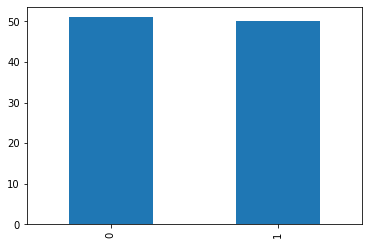

In [15]:
df['category'].value_counts().plot.bar()

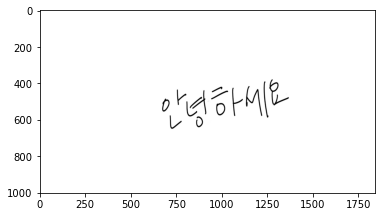

In [16]:
sample = random.choice(filenames)
img = load_img('mywriting/'+sample)
plt.imshow(img)

In [17]:
from keras.models import Sequential
from keras.layers import *

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(2, activation = 'sigmoid'))

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
lrr = ReduceLROnPlateau(monitor = 'val_acc', patience = 2, facrtor = 0.5,  mim_lr = 0.00001)
callback = [earlystop, lrr]

In [33]:
df['category'] = df['category'].replace({0:'정아', 1:'정은'})

In [34]:
trainDf, valDF = train_test_split(df, test_size = 0.2, random_state = 42)

In [35]:
trainDf['category'].value_counts()

정은    41
진현    39
Name: category, dtype: int64

In [36]:
totalTrain = trainDf.shape[0]
totalVal = valDF.shape[0]
batch_size = 5

In [37]:
trainDf.head() #데티어 프레임으로 저장됨

trainDf = trainDf.reset_index(drop =True)
valDF = valDF.reset_index(drop = True)

In [38]:
trainDatagen = ImageDataGenerator(rotation_range= 15 , rescale = 1./255, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

In [39]:
trainGenerator = trainDatagen.flow_from_dataframe(trainDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 80 validated image filenames belonging to 2 classes.


In [40]:
validDatagen = ImageDataGenerator(rescale = 1./255)

vaildGenerator = trainDatagen.flow_from_dataframe(trainDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 80 validated image filenames belonging to 2 classes.


In [41]:
exampleDf = trainDf.sample(1).reset_index(drop = True)


exampleGenerator = trainDatagen.flow_from_dataframe(exampleDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 1 validated image filenames belonging to 1 classes.


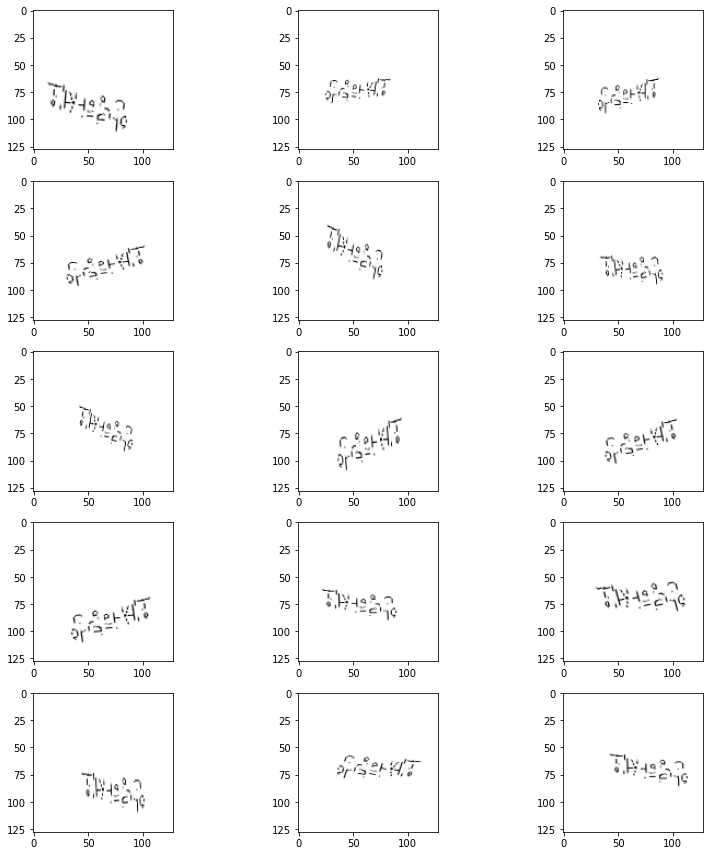

In [42]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5,3,i+1)
    for xb, yb in exampleGenerator:
        img = xb[0]
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

In [43]:
totalTrain = trainDf.shape[0]
totalValid = valDF.shape[0]
print(totalTrain, totalValid)

80 21


In [45]:
epochs = 4
history = model.fit_generator(
    trainGenerator, 
    epochs= epochs,
    validation_data = vaildGenerator,
    validation_steps=totalValid//batch_size,
    steps_per_epoch=totalTrain//batch_size,
    callbacks = callback
)

Epoch 1/4
16/16 [==============================] - 4s 258ms/step - loss: 0.6933 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/4
16/16 [==============================] - 4s 267ms/step - loss: 0.6931 - accuracy: 0.5500 - val_loss: 0.6931 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/4
16/16 [==============================] - 4s 260ms/step - loss: 0.6931 - accuracy: 0.5625 - val_loss: 0.6932 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 4/4
16/16 [==============================] - 4s 262ms/step - loss: 0.6931 - accuracy: 0.5875 - val_loss: 0.6931 - val_accuracy: 0.6000 - lr: 0.0010
